<a href="https://colab.research.google.com/github/my-quach/R-AI/blob/main/Money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from tensorflow.keras.models import load_model

model = load_model('trainAI (1).h5')
model.summary()  # xem cấu trúc mô hình

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 820,231 (3.13 MB)

 Trainable params: 820,229 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [4]:
# Tạo ImageDataGenerator, chuẩn hóa pixel về [0, 1]
datagen = ImageDataGenerator(rescale=1.0/255)

# Load ảnh từ thư mục theo batch
generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Banknote-2',       # đường dẫn đến thư mục chính
    target_size=(32, 32),    # resize ảnh về 32x32
    color_mode='rgb',        # 'grayscale' nếu ảnh trắng đen
    class_mode='categorical',# one-hot encoding cho nhãn
    batch_size=32,
    shuffle=True
)

# Load dữ liệu kiểm tra từ thư mục
test_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Banknote-2',
    target_size=(32, 32),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=10000,            # giả sử test dưới 10k ảnh
    shuffle=False
)

class_labels = ['10k', '100k', '20k', '200k', '50k']
# Lấy 1 batch đầu tiên
X_batch, y_batch = next(generator)

# Flatten ảnh để dùng cho ANN
X_batch_flat = X_batch.reshape(X_batch.shape[0], -1)  # shape: (batch_size, 32*32*3)

print("Input shape for ANN:", X_batch_flat.shape)  # ví dụ: (32, 3072)
print("Label shape (one-hot):", y_batch.shape)      # ví dụ: (32, 2) nếu có 2 class

Found 30 images belonging to 5 classes.
Found 30 images belonging to 5 classes.
Input shape for ANN: (30, 3072)
Label shape (one-hot): (30, 5)


In [3]:
from keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Dropout

In [5]:
#Load tập test
test_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Banknote-2',
    target_size=(32, 32),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=10000,  # Load tất cả test
    shuffle=False
)

# Lấy toàn bộ dữ liệu từ generator
x_train, y_train = next(generator)
x_test, y_test = next(test_generator)

# Flatten ảnh cho ANN
x_train = x_train.reshape(x_train.shape[0], -1)  # (50000, 32*32*3)
x_test = x_test.reshape(x_test.shape[0], -1)

# Không cần dùng to_categorical vì generator đã trả về one-hot
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

Found 30 images belonging to 5 classes.
(30, 3072) (30, 5)
(30, 3072) (30, 5)


In [6]:
generator.class_indices

{'10.000': 0, '100.000': 1, '20.000': 2, '200.000': 3, '50.000': 4}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step
Dự đoán: 10.000


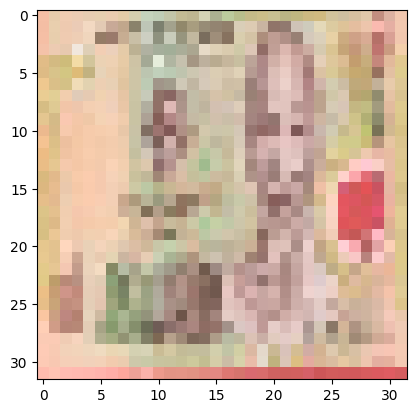

In [8]:
img=load_img('/content/drive/MyDrive/Banknote-2/10.000/10a.jpg', target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img_flatten=img.reshape(1,32*32*3)


# Tiền xử lý ảnh
img = img_to_array(img)
img_flatten = img.reshape(1, 32*32*3)
img_flatten = img_flatten.astype('float32') / 255  # normalize

# Dự đoán
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))

# Lấy nhãn class
class_labels = list(generator.class_indices.keys())

# In kết quả
print("Dự đoán:", class_labels[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Dự đoán: 100.000


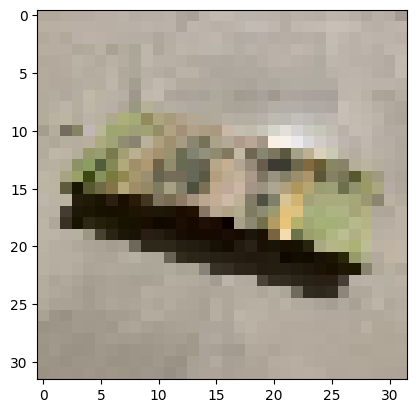

In [11]:
img=load_img('/content/drive/MyDrive/Banknote-2/100.000/100c.jpg', target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img_flatten=img.reshape(1,32*32*3)


# Tiền xử lý ảnh
img = img_to_array(img)
img_flatten = img.reshape(1, 32*32*3)
img_flatten = img_flatten.astype('float32') / 255  # normalize

# Dự đoán
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))

# Lấy nhãn class
class_labels = list(generator.class_indices.keys())

# In kết quả
print("Dự đoán:", class_labels[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Dự đoán: 200.000


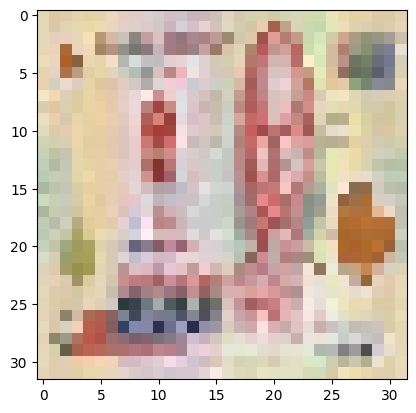

In [16]:
img=load_img('/content/drive/MyDrive/Banknote-2/200.000/200b.jpg', target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img_flatten=img.reshape(1,32*32*3)


# Tiền xử lý ảnh
img = img_to_array(img)
img_flatten = img.reshape(1, 32*32*3)
img_flatten = img_flatten.astype('float32') / 255  # normalize

# Dự đoán
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))

# Lấy nhãn class
class_labels = list(generator.class_indices.keys())

# In kết quả
print("Dự đoán:", class_labels[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Dự đoán: 200.000


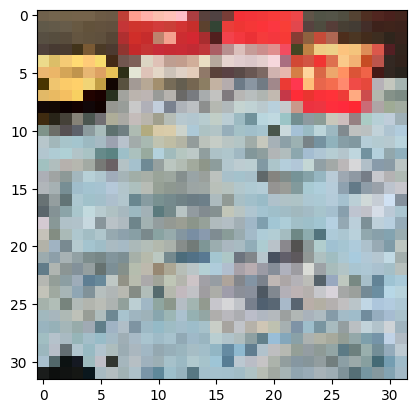

In [27]:
img=load_img('/content/drive/MyDrive/Banknote-2/20.000/20d.jpg', target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img_flatten=img.reshape(1,32*32*3)


# Tiền xử lý ảnh
img = img_to_array(img)
img_flatten = img.reshape(1, 32*32*3)
img_flatten = img_flatten.astype('float32') / 255  # normalize

# Dự đoán
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))

# Lấy nhãn class
class_labels = list(generator.class_indices.keys())

# In kết quả
print("Dự đoán:", class_labels[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Dự đoán: 10.000


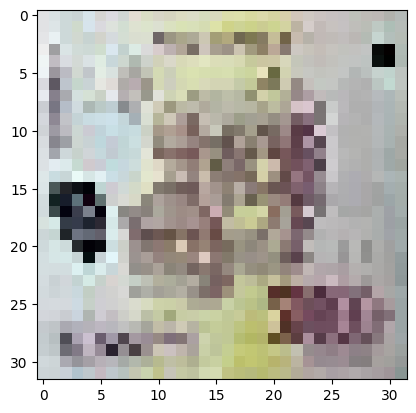

In [30]:
img=load_img('/content/drive/MyDrive/Banknote-2/50.000/50b.jpg', target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img_flatten=img.reshape(1,32*32*3)


# Tiền xử lý ảnh
img = img_to_array(img)
img_flatten = img.reshape(1, 32*32*3)
img_flatten = img_flatten.astype('float32') / 255  # normalize

# Dự đoán
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))

# Lấy nhãn class
class_labels = list(generator.class_indices.keys())

# In kết quả
print("Dự đoán:", class_labels[predicted_class_index])